In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os 

import matplotlib.pyplot as plt

In [ ]:
PATH = 'http://stat.columbia.edu/~rachel/datasets/'
dfs=pd.DataFrame()
for d in range(1,8):
  names=PATH + 'nyt' + str(d) + '.csv'
  bwt=pd.read_csv(names)
  # names=PATH + 'nyt' + str(d) + '.csv'
  # bwt=pd.concat(map(pd.read_csv, [names]), ignore_index=True)
  bwt['Day'] = d
  dfs = dfs.append(bwt)
  print('nyt'+str(d)+'.csv is uploaded to dataframe')

nyt1.csv is uploaded to dataframe
nyt2.csv is uploaded to dataframe
nyt3.csv is uploaded to dataframe
nyt4.csv is uploaded to dataframe
nyt5.csv is uploaded to dataframe
nyt6.csv is uploaded to dataframe
nyt7.csv is uploaded to dataframe


loaded each dataset in form of a loop 

In [ ]:
# pd.concat()
# bwt['Day']==20
# bwt
# len(bwt)

In [ ]:
dfs.head()

,Age,Gender,Impressions,Clicks,Signed_In,Day
0,36,0,3,0,1,1
1,73,1,3,0,1,1
2,30,0,3,0,1,1
3,49,1,3,0,1,1
4,47,1,11,0,1,1


In [ ]:
dfs.info()
print(' ')
dfs.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378934 entries, 0 to 452492
Data columns (total 6 columns):
 #   Column       Dtype
---  ------       -----
 0   Age          int64
 1   Gender       int64
 2   Impressions  int64
 3   Clicks       int64
 4   Signed_In    int64
 5   Day          int64
dtypes: int64(6)
memory usage: 180.5 MB
 


Age            int64
Gender         int64
Impressions    int64
Clicks         int64
Signed_In      int64
Day            int64
dtype: object

In [ ]:
dfs.describe()

,Age,Gender,Impressions,Clicks,Signed_In,Day
count,3.378934e+06,3.378934e+06,3.378934e+06,3.378934e+06,3.378934e+06,3.378934e+06
mean,2.947162e+01,3.637851e-01,4.999779e+00,9.244158e-02,7.000877e-01,4.160188e+00
std,2.363669e+01,4.810879e-01,2.235961e+00,3.099647e-01,4.582194e-01,2.019471e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,3.100000e+01,0.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
75%,4.800000e+01,1.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
max,1.120000e+02,1.000000e+00,2.000000e+01,6.000000e+00,1.000000e+00,7.000000e+00


A summary of the given data

**Task A**

Create a new variable, age_group, that categorizes users as “<18”, ”18-24”, ”25-
34”, ”35-44”, ”45-54”, “55-64” and “65+”. 

I checked to see what the minimum and maximum ages were in order to determine how i'll categorize the age especially the maximum age to know the upper bound 

In [ ]:
# bins =[0,18,25,35,45,55,65,109]
# labels =['<18','18-24','25-34','35-44','55-64','65+']
# bwt['ageGroup'] = pd.cut(bwt['Age'], bins=bins, labels=labels, right=False)
# print(bwt)

age_group = pd.cut(dfs.Age, bins=[0,18,25,35,45,55,65,109], labels=['<18','18-24','25-34','35-44','45-54','55-64','65+'],right=False)
dfs.insert(6, 'ageGroup', age_group)


In [ ]:
dfs.head(11)

,Age,Gender,Impressions,Clicks,Signed_In,Day,ageGroup
0,36,0,3,0,1,1,35-44
1,73,1,3,0,1,1,65+
2,30,0,3,0,1,1,25-34
3,49,1,3,0,1,1,45-54
4,47,1,11,0,1,1,45-54
5,47,0,11,1,1,1,45-54
6,0,0,7,1,0,1,<18
7,46,0,5,0,1,1,45-54
8,16,0,3,0,1,1,<18
9,52,0,4,0,1,1,45-54


looking at the description. all age groups are categorized based on users

**Task B:**
For single Day,

Plot the distributions of number impressions and click-through-rate 
(CTR=# clicks/# impressions), for these 6 age categories.

i'm choosing day 5

        Age  Gender  Impressions  Clicks  Signed_In  Day ageGroup
0        37       1            1       0          1    5    35-44
1        32       0            2       0          1    5    25-34
2         0       0            5       0          0    5      <18
3        60       0            6       0          1    5    55-64
4        40       1            2       0          1    5    35-44
...     ...     ...          ...     ...        ...  ...      ...
370323   57       1            3       0          1    5    55-64
370324   38       0            7       0          1    5    35-44
370325    0       0            6       0          0    5      <18
370326   30       1            3       0          1    5    25-34
370327   16       0            1       0          1    5      <18

[370328 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


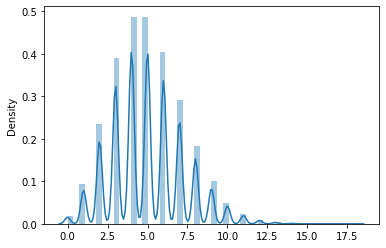

In [ ]:
day5=dfs[dfs['Day']==5]
print(day5)
ax1=sns.distplot(x=day5['Impressions'])

The impressions seem to be in a normal distribution with an average of around 5 for each age group. i can't determine the differences though. 

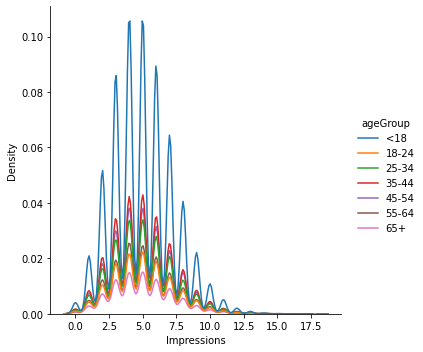

In [ ]:
ax1=sns.displot(data=day5, x=day5['Impressions'],kind='kde', hue='ageGroup')


Let's plot the mean to see which age group category has the most impressions

the '<18' seems to have the most impressions followed by '35-44'

In [ ]:

#print(bwt.groupby(['ageGroup'],as_index=False).mean().head())
# bwt.groupby(['ageGroup']).mean('Impressions')
# ageGb = bwt.groupby('ageGroup').mean(['Impressions'])
# bwt['imp_mean']=bwt['Impressions']
# ageGb.head()
ageGb = day5[['ageGroup','Impressions']].groupby('ageGroup').mean()
ageGb.rename(columns={'Impressions':'imp_mean'},inplace=True)
ageGb


,imp_mean
ageGroup,
<18,4.996761
18-24,5.011332
25-34,5.002788
35-44,4.988480
45-54,5.012228
55-64,4.993094
65+,4.986401


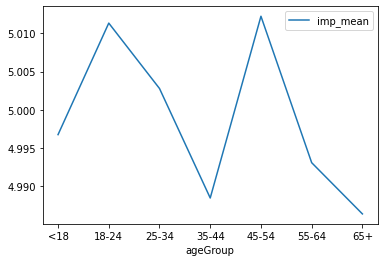

In [ ]:
ageGb.plot()



now lets see the ctr. i created a variable for the ctr to analyze and visualize it

In [ ]:
day5['ctr']=day5['Clicks']/day5['Impressions'] #impressions and click through rate
click_behaviour= day5['ctr']
day5.head(8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Gender,Impressions,Clicks,Signed_In,Day,ageGroup,ctr
0,37,1,1,0,1,5,35-44,0.00
1,32,0,2,0,1,5,25-34,0.00
2,0,0,5,0,0,5,<18,0.00
3,60,0,6,0,1,5,55-64,0.00
4,40,1,2,0,1,5,35-44,0.00
5,49,0,7,0,1,5,45-54,0.00
6,0,0,4,0,0,5,<18,0.00
7,0,0,4,1,0,5,<18,0.25


In [ ]:
ctrGb = day5[['ageGroup','Clicks']].groupby('ageGroup').mean()
ctrGb.rename(columns={'Clicks':'ctr_mean'},inplace=True)
ctrGb

,ctr_mean
ageGroup,
<18,0.142581
18-24,0.056111
25-34,0.049553
35-44,0.049613
45-54,0.050261
55-64,0.097049
65+,0.152668


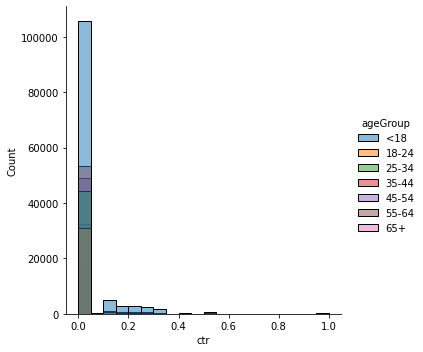

In [ ]:
sns.displot(data=day5, x=day5['ctr'], hue='ageGroup')

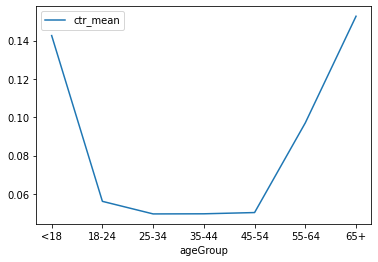

In [ ]:
ctrGb.plot()
# sns.displot(x=ctrGb['ctr_mean'])

The means for the "65+" and "<18" are relatively higher than other groups. lets see this by plotting a graph ctr means by age group

<Figure size 864x432 with 0 Axes>

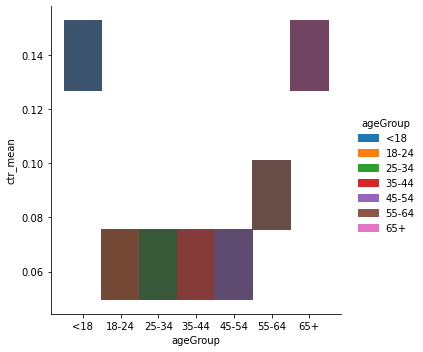

In [ ]:
plt.figure(figsize=(12,6))
sns.displot(data=ctrGb, x='ageGroup', y='ctr_mean', hue='ageGroup')

**Define a new variable to segment or categorize users based on their click behavior.**

Trying to see the segment for users based on their click behaviours


In [ ]:
clicks_gender1=dfs[dfs['Gender']==1].groupby('ageGroup').sum()['Clicks']
clicks_gender0=dfs[dfs['Gender']==0].groupby('ageGroup').sum()['Clicks']
print(clicks_gender0)
print(clicks_gender1)

ageGroup
<18      148818
18-24      7794
25-34     10171
35-44     12493
45-54     11230
55-64     15815
65+       20331
Name: Clicks, dtype: int64
ageGroup
<18      10554
18-24     8661
25-34    11086
35-44    13839
45-54    12526
55-64    17442
65+      11594
Name: Clicks, dtype: int64


Text(0.5, 1.0, 'Amount of clicks for each age group')

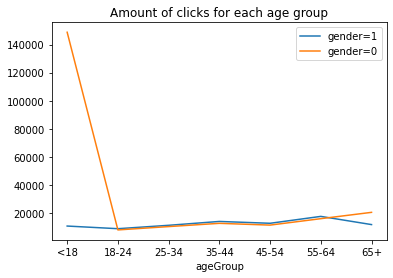

In [ ]:
age_labels=['<18','18-24','25-34','35-44','45-54','55-64','65+']
clicks_gender1.plot(legend=age_labels)
clicks_gender0.plot(legend=age_labels)
plt.legend(['gender=1','gender=0'])
plt.title('Amount of clicks for each age group')

In [ ]:
sign_in = dfs[dfs['Signed_In']==1]
by_age = dfs.groupby(['ageGroup', 'Signed_In'])['Clicks'].sum().reset_index()
print(by_age.head(100))

   ageGroup  Signed_In  Clicks
0       <18          0  143902
1       <18          1   15470
2     18-24          0       0
3     18-24          1   16455
4     25-34          0       0
5     25-34          1   21257
6     35-44          0       0
7     35-44          1   26332
8     45-54          0       0
9     45-54          1   23756
10    55-64          0       0
11    55-64          1   33257
12      65+          0       0
13      65+          1   31925


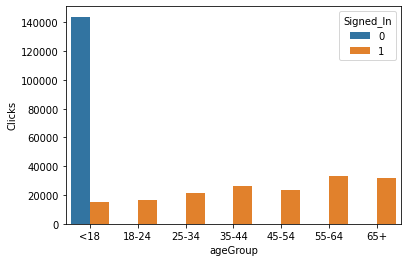

In [ ]:
sns.barplot(data=by_age,x='ageGroup', y='Clicks', hue='Signed_In')

In [ ]:
by_imp=day5.groupby(['ageGroup','Gender'])['Impressions'].mean().reset_index()
print(by_imp.head(100))

   ageGroup  Gender  Impressions
0       <18       0     4.997057
1       <18       1     4.992351
2     18-24       0     5.003873
3     18-24       1     5.017790
4     25-34       0     5.015701
5     25-34       1     4.991748
6     35-44       0     4.975010
7     35-44       1     5.000198
8     45-54       0     5.020492
9     45-54       1     5.004986
10    55-64       0     5.002631
11    55-64       1     4.984843
12      65+       0     4.997988
13      65+       1     4.966018


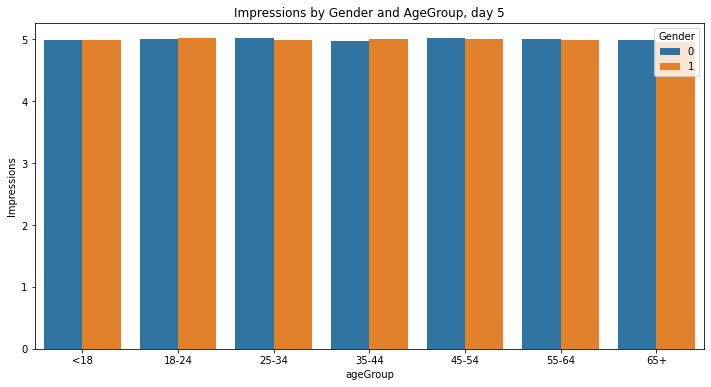

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=by_imp,x='ageGroup', y='Impressions', hue='Gender')
plt.title('Impressions by Gender and AgeGroup, day 5')
plt.show()
# bwt['Clicks'].describe()


This shows an interesting result - generally, the average number of impressions seem to be slightly different in comparison with the both Genders. Gender, ‘0’,which are females seem to have a higher average of impressions with some of the age groups.

the graph data shows patterns of a lot of customers are in the '<18' age group and overall, people are not clicking than those who do; overlooking those less than 18

**Task C **

**Create metrics/measurements/statistics** that summarize the data
For this let’s just look at numeric data 

In [ ]:
# dy.head()

   Day       Age    Gender  Impressions    Clicks  Signed_In
0    1  1.398260  0.062743     5.000345  0.142745   0.091616
1    2  1.424795  0.064867     5.002513  0.143053   0.093346
2    3  1.413644  0.064176     4.995384  0.142241   0.092737
3    4  1.387487  0.062846     5.010917  0.142278   0.090963
4    5  1.393521  0.062935     4.996761  0.142581   0.091420
5    6  1.386772  0.061434     4.998193  0.142884   0.090845
6    7  1.408044  0.062211     5.009640  0.143911   0.092351


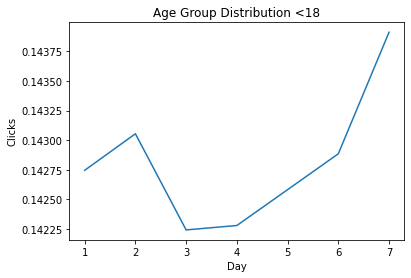

   Day        Age    Gender  Impressions    Clicks  Signed_In
0    1  20.833317  0.533764     5.002826  0.053251        1.0
1    2  20.845914  0.540782     4.987189  0.056645        1.0
2    3  20.848870  0.534462     4.997452  0.056133        1.0
3    4  20.833451  0.534286     5.001544  0.054681        1.0
4    5  20.856434  0.535945     5.011332  0.056111        1.0
5    6  20.848127  0.515242     4.981058  0.054235        1.0
6    7  20.854664  0.510621     4.980664  0.054774        1.0


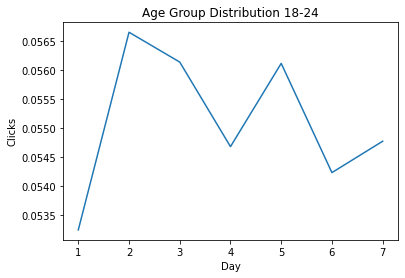

   Day        Age    Gender  Impressions    Clicks  Signed_In
0    1  29.503352  0.532162     4.993829  0.050486        1.0
1    2  29.500738  0.541073     5.007083  0.050230        1.0
2    3  29.510056  0.530597     4.996425  0.049663        1.0
3    4  29.493221  0.541575     4.994947  0.050135        1.0
4    5  29.510026  0.539080     5.002788  0.049553        1.0
5    6  29.499166  0.515084     4.992979  0.048985        1.0
6    7  29.483935  0.512435     5.000772  0.049774        1.0


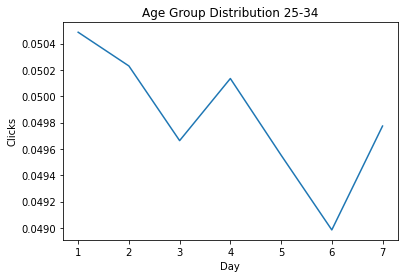

   Day        Age    Gender  Impressions    Clicks  Signed_In
0    1  39.494680  0.531696     5.021507  0.051679        1.0
1    2  39.512961  0.545278     4.987068  0.051019        1.0
2    3  39.506689  0.531317     5.008378  0.050715        1.0
3    4  39.490211  0.536755     4.997100  0.050827        1.0
4    5  39.513640  0.534772     4.988480  0.049613        1.0
5    6  39.498881  0.515843     4.994340  0.050802        1.0
6    7  39.504272  0.510262     4.990387  0.050055        1.0


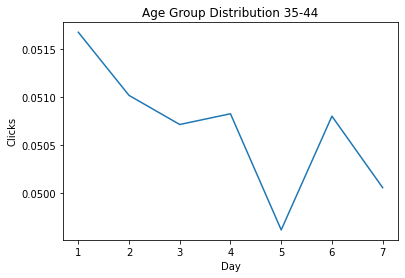

   Day        Age    Gender  Impressions    Clicks  Signed_In
0    1  49.492580  0.528979     5.010406  0.050274        1.0
1    2  49.506168  0.543257     4.994392  0.051227        1.0
2    3  49.488382  0.529720     4.984925  0.048965        1.0
3    4  49.504917  0.536398     4.987168  0.051295        1.0
4    5  49.477344  0.532958     5.012228  0.050261        1.0
5    6  49.484033  0.515771     4.998805  0.049909        1.0
6    7  49.517303  0.512456     4.992462  0.049352        1.0


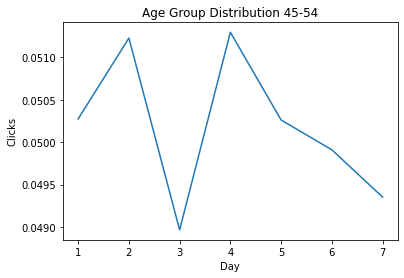

   Day        Age    Gender  Impressions    Clicks  Signed_In
0    1  59.498189  0.536188     5.022308  0.101837        1.0
1    2  59.497514  0.543469     5.020435  0.101605        1.0
2    3  59.478363  0.535030     5.002101  0.099940        1.0
3    4  59.506138  0.534441     5.007956  0.100752        1.0
4    5  59.494009  0.536168     4.993094  0.097049        1.0
5    6  59.486479  0.511648     4.990045  0.101388        1.0
6    7  59.513001  0.508738     5.010051  0.099051        1.0


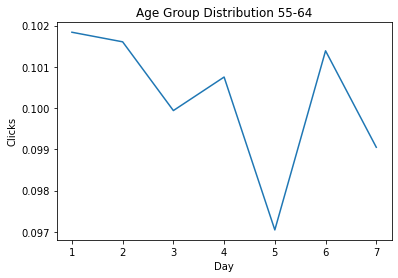

   Day        Age    Gender  Impressions    Clicks  Signed_In
0    1  72.988697  0.363266     5.012347  0.151289        1.0
1    2  72.939704  0.371365     4.996242  0.146404        1.0
2    3  72.961486  0.366571     4.987018  0.151569        1.0
3    4  72.978785  0.368751     5.029751  0.149906        1.0
4    5  73.017662  0.362427     4.986401  0.152668        1.0
5    6  72.960043  0.353406     5.010736  0.149404        1.0
6    7  73.036342  0.346260     5.001184  0.150312        1.0


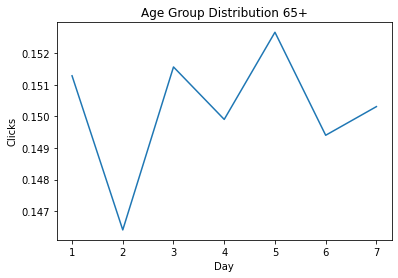

In [ ]:
for al in age_labels:
  dy=dfs[dfs['ageGroup'] == al].groupby('Day').mean().reset_index()
  print(dy)
  sns.lineplot(data=dy, x='Day', y='Clicks')
  plt.title('Age Group Distribution '+ al)
  plt.show()

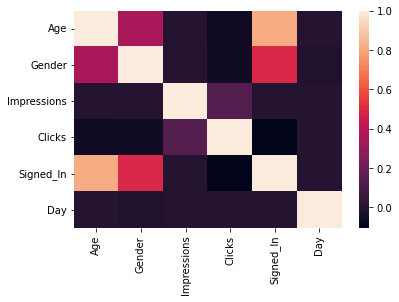

In [ ]:
sns.heatmap(dfs.corr())

:on checking the correlation plot helps us to see that there are no correlations between age and signed in users but there seem to be some correlations between their impressions and their clicks also their click through rate